In [14]:
import cv2
import numpy as np
import os
import pandas as pd
import sys
from PIL import Image
from matplotlib import pyplot as plt
from infocus import dropletnetinfocus
from defocus import dropletnetdefocus
import torch
import torchvision
%matplotlib inline

In [186]:
# DEFOCUS

# ALL CLASSES
# modelPath = r"E:\Academics\DDP\Code\CNN\droplet-parameter-estimation\defocus\all_classes\model\train_all_classes_1\model10.torch"

# NO 200
# modelPath = r"E:\Academics\DDP\Code\CNN\droplet-parameter-estimation\defocus\no_200\model\train_no200_100mp_1\model10.torch"

# NO 100
# modelPath = r"E:\Academics\DDP\Code\CNN\droplet-parameter-estimation\defocus\no_100\model\train_no_100_1\model7.torch"

# INFOCUS

# ALL CLASSES
# modelPath = r"E:\Academics\DDP\Code\CNN\droplet-parameter-estimation\infocus\all\model\train_infocus_all_1\model15.torch"

# NO 200
# modelPath = r"E:\Academics\DDP\Code\CNN\droplet-parameter-estimation\infocus\no_200\model\train_no_200_1\model20.torch"

# NO 100
modelPath = r"E:\Academics\DDP\Code\CNN\droplet-parameter-estimation\infocus\no_100\model\train_no_100_1\model20.torch"

In [106]:
def calc_distanc(folder, dia):
    if dia == 50:
        if folder[0] == 'm':
            pos = 50 - int(folder[1:])
        else:
            pos = 50 + int(folder[1:])        
    elif dia == 100:
        if folder[0] == 'm':
            pos = 40 - int(folder[1:])
        else:
            pos = 40 + int(folder[1:])         
    elif dia == 150:
        if folder[0] == 'm':
            pos = 70 - int(folder[1:])
        else:
            pos = 70 + int(folder[1:])
    elif dia == 200:
        if folder[0] == 'm':
            pos = 110 - int(folder[1:])
        else:
            pos = 110 + int(folder[1:])
    elif dia == 300:
        if folder[0] == 'm':
            pos = 40 - int(folder[1:])
        else:
            pos = 40 + int(folder[1:])
    elif dia == 400:
        if folder[0] == 'm':
            pos = 0 - int(folder[1:])
        else:
            pos = int(folder[1:])
    return pos

In [114]:
# Creating list of dicts containing raw file details
# DEFOCUS

imgpathsDefocus = []
folder_list = ['D50', 'D100', 'D150', 'D200', 'D300', 'D400']
for direc in folder_list:
    print(direc)
    path_prefix = os.path.join(r"E:\Academics\DDP\Data\Defocused", direc) 
    for folder in os.listdir(os.path.join(r"E:\Academics\DDP\Data\Defocused", direc)):
        for imgname in os.listdir(os.path.join(path_prefix, folder)):
            if imgname.endswith(".tif"):
                dia = int(direc[1:])
                pos = calc_distanc(folder, dia)
                try:
                    name = str(dia) + '_' + folder + '_' + imgname.split("_")[1]
                except:
                    print(imgname)
                    print(folder)
                imgpath = os.path.join(path_prefix, folder, imgname)

                droplet_dict = {
                    'dia' : dia,
                    'pos' : pos,
                    'name' : name,
                    'path' : imgpath
                }
                imgpathsDefocus.append(droplet_dict)
print(len(imgpathsDefocus))

D50
D100
D150
D200
D300
D400
52464


In [115]:
# Creating list of dicts containing raw file details
# DEFOCUS In range

imgpathsDefocusRange = []
folder_list = ['D50', 'D100', 'D150', 'D200', 'D300', 'D400']
for direc in folder_list:
    print(direc)
    path_prefix = os.path.join(r"E:\Academics\DDP\Data\Defocused", direc) 
    for folder in os.listdir(os.path.join(r"E:\Academics\DDP\Data\Defocused", direc)):
        dia = int(direc[1:])
        pos = calc_distanc(folder, dia)
        if pos > 300 or pos < -300:
            continue
        for imgname in os.listdir(os.path.join(path_prefix, folder)):
            if imgname.endswith(".tif"):   
                try:
                    name = str(dia) + '_' + folder + '_' + imgname.split("_")[1]
                except:
                    print(imgname)
                    print(folder)
                imgpath = os.path.join(path_prefix, folder, imgname)

                droplet_dict = {
                    'dia' : dia,
                    'pos' : pos,
                    'name' : name,
                    'path' : imgpath
                }
                imgpathsDefocusRange.append(droplet_dict)
print(len(imgpathsDefocusRange))

D50
D100
D150
D200
D300
D400
26791


In [119]:
# Creating list of dicts containing raw file details
# DEFOCUS 100 

imgpathsDefocus100 = []
folder_list = ['D100']
for direc in folder_list:
    print(direc)
    path_prefix = os.path.join(r"E:\Academics\DDP\Data\Defocused", direc) 
    for folder in os.listdir(os.path.join(r"E:\Academics\DDP\Data\Defocused", direc)):
        dia = int(direc[1:])
        pos = calc_distanc(folder, dia)
        if pos > 300 or pos < -300:
            continue
        for imgname in os.listdir(os.path.join(path_prefix, folder)):
            if imgname.endswith(".tif"):   
                try:
                    name = str(dia) + '_' + folder + '_' + imgname.split("_")[1]
                except:
                    print(imgname)
                    print(folder)
                imgpath = os.path.join(path_prefix, folder, imgname)

                droplet_dict = {
                    'dia' : dia,
                    'pos' : pos,
                    'name' : name,
                    'path' : imgpath
                }
                imgpathsDefocus100.append(droplet_dict)
print(len(imgpathsDefocus100))

D100
3852


In [120]:
# Creating list of dicts containing raw file details
# DEFOCUS 200 

imgpathsDefocus200 = []
folder_list = ['D200']
for direc in folder_list:
    print(direc)
    path_prefix = os.path.join(r"E:\Academics\DDP\Data\Defocused", direc) 
    for folder in os.listdir(os.path.join(r"E:\Academics\DDP\Data\Defocused", direc)):
        dia = int(direc[1:])
        pos = calc_distanc(folder, dia)
        if pos > 300 or pos < -300:
            continue
        for imgname in os.listdir(os.path.join(path_prefix, folder)):
            if imgname.endswith(".tif"):   
                try:
                    name = str(dia) + '_' + folder + '_' + imgname.split("_")[1]
                except:
                    print(imgname)
                    print(folder)
                imgpath = os.path.join(path_prefix, folder, imgname)

                droplet_dict = {
                    'dia' : dia,
                    'pos' : pos,
                    'name' : name,
                    'path' : imgpath
                }
                imgpathsDefocus200.append(droplet_dict)
print(len(imgpathsDefocus200))

D200
4688


In [116]:
# Creating list of dicts containing raw file details
# Infocus

imgpathsInfocus = []
path_prefix = "E:\Academics\DDP\Data\Infocus\\"
for folder in os.listdir("E:\Academics\DDP\Data\Infocus"):
    for imgname in os.listdir(path_prefix + folder):
        if imgname.endswith(".tif"):
            dia = int(folder[1:])
            try:
                name = str(dia) + '_' + folder + '_' + imgname.split("_")[1]
            except:
                print(imgname)
                print(folder)
            imgpath = path_prefix + folder + "\\" + imgname
            droplet_dict = {
                'dia' : dia,
                'name' : name,
                'path' : imgpath
            }
            imgpathsInfocus.append(droplet_dict)
print(len(imgpathsInfocus))            

542


In [177]:
# Creating list of dicts containing raw file details
# Infocus 100

imgpathsInfocus100 = []
path_prefix = "E:\Academics\DDP\Data\Infocus\\"
for imgname in os.listdir(path_prefix + 'd100'):
    if imgname.endswith(".tif"):
        dia = 100
        try:
            name = str(dia) + '_' + imgname.split("_")[1]
        except:
            print(imgname)
            print(folder)
        imgpath = path_prefix + "d100\\" + imgname
        droplet_dict = {
            'dia' : dia,
            'name' : name,
            'path' : imgpath
        }
        imgpathsInfocus100.append(droplet_dict)
print(len(imgpathsInfocus100))     

83


In [179]:
# Creating list of dicts containing raw file details
# Infocus 200

imgpathsInfocus200 = []
path_prefix = "E:\Academics\DDP\Data\Infocus\\"
for imgname in os.listdir(path_prefix + 'd200'):
    if imgname.endswith(".tif"):
        dia = 200
        try:
            name = str(dia) + '_' + imgname.split("_")[1]
        except:
            print(imgname)
            print(folder)
        imgpath = path_prefix + "d200\\" + imgname
        droplet_dict = {
            'dia' : dia,
            'name' : name,
            'path' : imgpath
        }
        imgpathsInfocus200.append(droplet_dict)
print(len(imgpathsInfocus200))            

107


In [148]:
def label_droplets(label, origin, img):
    font = cv2.FONT_HERSHEY_SIMPLEX
    fontScale = 0.8
    color = (255, 0, 0)
    thickness = 1
    if type(label) != list:
        text = str(round(label, 2)) + " mm"
    else:
        text = str(round(label[0],2)) + ' ' + str('micrometre ') + str(round(label[1],2)) + " mm"
    img = cv2.putText(img, text, origin, font, 
                    fontScale, color, thickness, cv2.LINE_AA)
    return img

In [10]:
default_transforms = torchvision.transforms.Compose([
    torchvision.transforms.ToTensor(),
    torchvision.transforms.Grayscale(num_output_channels = 1),
    torchvision.transforms.Normalize((0.5), (0.5)),
    ]
)

In [149]:
def predict(ROI):
    ROI = default_transforms(ROI).unsqueeze(0).to(device)
    preds = model(ROI).squeeze()
    outputs = torch.sigmoid(preds)
    outputs = outputs.cpu().detach().numpy()
    if type(outputs) != list:
        out = 50 + outputs * 350
    else:
        dia_pred = 50 + outputs[0] * 350
        pos_pred = -300 + outputs[1] * 600
        out = [dia_pred, pos_pred]
    print(out)
    return out

In [142]:
# Load image, grayscale, Threshold 
def crop_defocus(imgdata, model):
    try:
        if imgdata['pos'] > 300 or imgdata['pos'] < -300:
            print("Droplet position out of range")
    except:
        pass
    bg = cv2.imread(r"E:\Academics\DDP\Data\Defocused\bg\bg.png")
    image = cv2.imread(imgdata['path'])
    original = image.copy()
    gray = cv2.blur(cv2.cvtColor(image, cv2.COLOR_BGR2GRAY),(7,7))
    
# Different threshold conditions for different diameters
    if imgdata['dia'] == 400:
        thresh = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)[1]
    else:
        thresh = cv2.threshold(gray, 138, 255, cv2.THRESH_BINARY_INV)[1]

# Find contours, obtain bounding box, extract and save ROI
    cnts = cv2.findContours(thresh, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = cnts[0] if len(cnts) == 2 else cnts[1]

# Creating bounding boxes for the detected countours, creating 256 x 256 crops of the ROIs
    ROI_number = 0
    for cnt in cnts:
        x,y,w,h = cv2.boundingRect(cnt)
        
        # Rejecting ROIs that are not roughly square shaped to avoid low-quality training data
        if w/h > 0.9 and w/h < 1.1 and w*h > 2500:
            
            # Drawing rectangle around ROI
            image = cv2.rectangle(image, (x,y), (x+w,y+h), (0, 255, 0), 2)
            x_center = int(0.5*(2*x + w))
            y_center = int(0.5*(2*y + h))
            x_left = max(int(x_center - w*0.7), 0)
            y_left = max(int(y_center - h*0.7), 0)
            x_right = min(int(x_center + w*0.7), image.shape[1])
            y_right = min(int(y_center + h*0.7), image.shape[0])
            ROI = original[y_left:y_right, x_left:x_right]
            
        # Pasting the ROI on 512 x 512 background
            ROI = cv2.cvtColor(ROI, cv2.COLOR_BGR2RGB)
            back_im = Image.fromarray(bg).copy()
            origin_bg = ((512 - ROI.shape[1])//2, (512 - ROI.shape[0])//2)
            ROI_pil = Image.fromarray(ROI)
            back_im.paste(ROI_pil, origin_bg)
            
            origin = (x_center, y_right)
            label = predict(back_im)
            image = label_droplets(label, origin, image)
    fig = plt.figure(figsize = (10,10)) # create a 5 x 5 figure 
    ax = fig.add_subplot(111)
    ax.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.show()

In [159]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = dropletnetinfocus.DropletNet()
model = model.to(device)
print(device)

cuda


In [194]:
#----------------Load State--------------------------------------------------------------------------
model.load_state_dict(torch.load(modelPath, map_location= device)) # Load trained model
model.eval() # Set net to evaluation mode, usually usefull in this case its fail

DropletNet(
  (model): Sequential(
    (0): ConvBlock(
      (model): Sequential(
        (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
        (1): ReLU()
      )
    )
    (1): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (2): ConvBlock(
      (model): Sequential(
        (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1))
        (1): ReLU()
      )
    )
    (3): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): ConvBlock(
      (model): Sequential(
        (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1))
        (1): ReLU()
      )
    )
    (5): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): ConvBlock(
      (model): Sequential(
        (0): Conv2d(8, 8, kernel_size=(3, 3), stride=(1, 1))
        (1): ReLU()
      )
    )
    (7): MaxPool2d(kernel_size=5, stride=3, padding=0, dilation=1, ceil_mode=False)
    (8): Flatten(start_dim=1, end_dim=-1)
    (9): Linear(
  

{'dia': 100, 'name': '100_37.tif', 'path': 'E:\\Academics\\DDP\\Data\\Infocus\\d100\\d100_37.tif'}
66.60396084189415
66.66416488587856
66.7629212141037
66.7659031227231
66.81080125272274


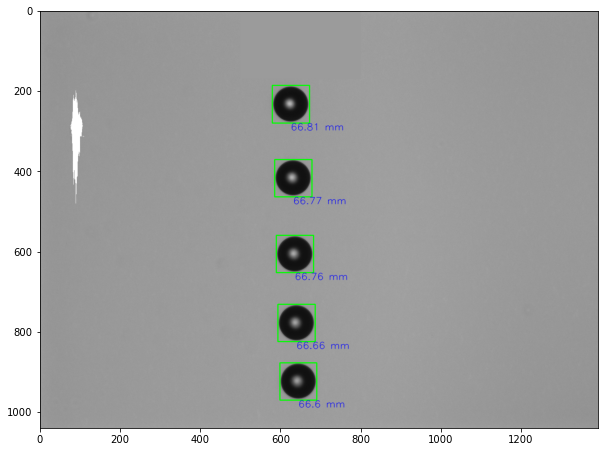

In [195]:
print(imgpathsInfocus100[30])
crop_defocus(imgpathsInfocus100[30], model)